# Aula 6 - Análises com duas variáveis
**Objetivo da aula**: ao fim desta aula, o aluno será capaz de encontrar correlações entre variáveis para gerar decisões e planejamentos baseados em evidências.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns


# Exercício 1
*Objetivo: usar um índice de dataframe*

Quando criamos um dataframe, em geral "ganhamos" uma coluna extra à esquerda, que é o número da linha. Por exemplo:

In [2]:
dados = {'Nome': ['Bilbo', 'Frodo', 'Gandalf', 'Aragorn'],
        'Altura': ['Baixo', 'Baixo', 'Alto', 'Alto'],
        'Magia': ['Não', 'Não', 'Sim', 'Não'],
        'Anel': ['Sim', 'Sim', 'Não', 'Não']}

sda1 = pd.DataFrame(dados)
sda1.head()

,Nome,Altura,Magia,Anel
0,Bilbo,Baixo,Não,Sim
1,Frodo,Baixo,Não,Sim
2,Gandalf,Alto,Sim,Não
3,Aragorn,Alto,Não,Não


O índice permite usar o método `.loc` para encontrar dados de uma linha específica:

In [3]:
print(sda1.loc[1])

Nome      Frodo
Altura    Baixo
Magia       Não
Anel        Sim
Name: 1, dtype: object


É comum, porém, que queiramos acessar nossos dados por alguma chave específica, que faça mais sentido com o nosso problema. Por exemplo, talvez queiramos acessar nossos dados de exemplo usando o nome das personagens como chave. Nesse caso, podemos usar o método `.set_index()`:

In [4]:
sda1 = sda1.set_index('Nome')
print(sda1.loc['Frodo'])

Altura    Baixo
Magia       Não
Anel        Sim
Name: Frodo, dtype: object


Usando a reindexação, encontre o PIB per capita do Brasil, da Argentina, do Uruguai e do Paraguai nos dados do banco mundial.

In [5]:
df = pd.read_csv("dados/WorldBank/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3731360.csv", skiprows=3)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,...,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN


In [6]:
# Resolva seu exercício aqui

# Exercício 2
*Objetivo: usar scatter plots para evidenciar como variáveis se relacionam*

Um *scatterplot*, o *gráfico de espalhamento*, mostra pontos de duas séries numéricas alinhadas (isto é, que se referem ao mesmo "indivíduo"). Veja este exemplo:

In [7]:
dados = {'Nome': ['Bilbo', 'Frodo', 'Gandalf', 'Aragorn', 'Smeagol'],
        'Altura': [0.9, 0.93, 1.6, 1.8, 0.8, ],
        'Relevância para a história': [10, 10, 7, 5, 10],
        'Vitórias sobre o Balrog': [0, 0, 1, 0, 0]}

sda2 = pd.DataFrame(dados)
sda2 = sda2.set_index('Nome')
sda2.head()

,Altura,Relevância para a história,Vitórias sobre o Balrog
Nome,,,
Bilbo,0.90,10,0
Frodo,0.93,10,0
Gandalf,1.60,7,1
Aragorn,1.80,5,0
Smeagol,0.80,10,0


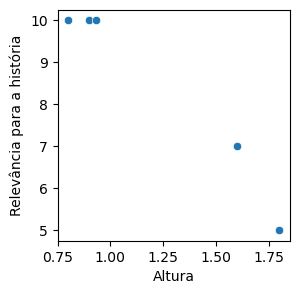

In [8]:
plt.figure(figsize=(3,3))
sns.scatterplot(data=sda2, x='Altura', y='Relevância para a história')
plt.show()

Neste caso, podemos visualizar o fato de que personagens mais altas tendem a ter menor relevância para a história.

---

Usando um *scatterplot*, use dados do Banco Mundial para discutir a seguinte afirmação:

*Os países que são mais ricos hoje são os mesmos países que já eram os mais ricos há muitas décadas*

In [9]:
# Resolva seu exercício aqui

# Exercício 3
*Objetivo: explica as consequências de usar `inner join` para cruzar dados de diferentes dataframes*

É muito comum que tenhamos diferentes dataframes que trazem dados sobre os mesmos elementos. Por exemplo, os dataframes `sda1` e `sda2` deste notebook, até o momento, trazem dados diferentes sobre as mesmas personagens. Analisando o código abaixo, responda:

1. O que o método `concat` faz?
1. Qual é a importância da coluna `index` para o método `concat`?
1. O que `concat` faz com os índices que não coincidem entre os dois dataframes?
1. Troque o parâmetro `join='inner'` para `join='outer'`. Qual é a diferença no resultado?

In [10]:
sda_ = pd.concat((sda1, sda2), join='inner', axis=1)
sda_.head()


,Altura,Magia,Anel,Altura,Relevância para a história,Vitórias sobre o Balrog
Nome,,,,,,
Bilbo,Baixo,Não,Sim,0.90,10,0
Frodo,Baixo,Não,Sim,0.93,10,0
Gandalf,Alto,Sim,Não,1.60,7,1
Aragorn,Alto,Não,Não,1.80,5,0
Smeagol,NaN,NaN,NaN,0.80,10,0


# Exercício 4
*Objetivo: usar dados de múltiplas tabelas para construir uma hipótese*

O desmatamento é um problema ligado ao desenvolvimento sustentável de países. É comum ouvirmos dizer que os países mais ricos do mundo já devastaram suas próprias florestas e, portanto, o desmatamento é um caminho inevitável para o progresso de um país.

Os dataframes abaixo carregam dados do Banco Mundial referentes ao PIB per capita e à porcentagem de área coberta por florestas de cada país.

Use esses dados para gerar uma figura que responda à pergunta:

*Quanto mais rico é um país, menor é sua área coberta por florestas*

In [11]:
df_area_florestal = pd.read_csv('dados/WorldBank/API_AG.LND.FRST.ZS_DS2_en_csv_v2_3731376.csv', skiprows=3)
df_pib_per_capita = pd.read_csv('dados/WorldBank/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3731360.csv', skiprows=3)

#df_area_florestal.set_index('')
df_area_florestal.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,NaN
1,Africa Eastern and Southern,AFE,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.972492,31.761842,31.551270,31.340526,31.119431,30.903543,30.690224,30.469798,30.251786,NaN
2,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,NaN
3,Africa Western and Central,AFW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.498099,20.410143,20.322187,20.234231,20.152610,20.071327,19.986100,19.901215,19.816762,NaN
4,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,56.988751,56.543526,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,NaN


# Exercício 5
*Objetivo: explicar covariância e correlação em termos da semelhança com uma reta para posteriormente interpretá-las*

Quando temos duas séries ($x$ e $y$) de números, podemos nos fazer a seguinte pergunta:

*"O aumento de $x$ está ligado ao aumento de $y$?"*

As visualizações são formas importantes para entender essa relação entre os aumentos dos valores, mas também podemos usar medidas numéricas que indicam objetivamente qual é essa relação.

* Covariância: $c = \sum_{i=1}^N{ (x_i-\bar{x}) (y_i-\bar{y}) }  $, onde $N$ é o número de elementos nas séries $x$ e $y$ e $\bar{x}$ representa a média da série $x$.

* Correlação: $r = \frac{c}{\sigma(x) \sigma(y)}$, onde $\sigma(x)$ é o desvio padrão da série $x$ e $c$ é a covariância, calculada conforme acima.

Covariância e correlação são medidas que indicam o quanto o scatterplot de $x$ por $y$ se parece com uma reta. O código abaixo demosntra seu uso.

Anote o que acontece com (a) o **alinhamento entre os pontos**, (b) a **inclinação da reta que parece passar próxima aos pontos**, (c) a **covariância** calculada, e (d) a **correlação** calculada nas seguintes situações:


1. Aumentamos `a`, deixando `n=0` e `b=0`
1. Aumentamos `n`, deixando `a` fixo em um valor qualquer e `b=0`
1. Aumentamos `a`, deixando `n=1` e `b=0`
1. Mudamos o sinal de `a`, deixnado `n` e `b` fixos
1. Mudamos o valor de `b`


Covariância: 0.08850478967097042
Correlação: 1.0


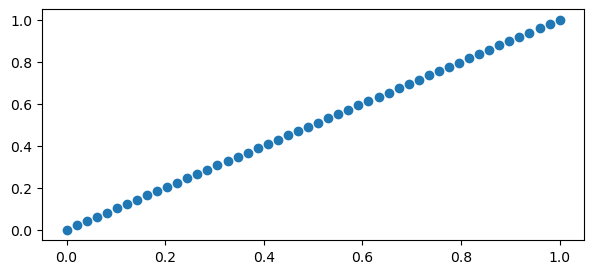

In [12]:
import numpy as np
import matplotlib.pyplot as plt

a = 1.0
b = 0.0
n = 0.0
x = np.linspace(0,1,50)
y = a * x + n * np.random.randn(len(x)) + b
c = np.cov(x, y)[0,1]
r = np.corrcoef(x, y)[0, 1]
print("Covariância: " + str(c))
print("Correlação: " + str(r))
plt.figure( figsize=(7,3) )
plt.scatter(x, y)
plt.show()

# Exercício 6
*Objetivo: explicar a limitação da correlação para ligações não-lineares*

É comum pensarmos que, se há uma correlação próxima de 1 ou -1 entre duas grandezas, então elas estão ligadas. De forma semelhante, é comum pensar que, se a correlção é próxima a zero, então não existe nenhuma relação entre as duas grandezas.

Analise o código abaixo e suas saídas, e responda, com base em exemplos ou contra-exemplos:

1. Se a correlação entre duas variáveis é próxima a 1, então **existe** algum mapeamento ou função que permite calcular uma das grandezas com base na outra.
1. Se a correlação entre duas variáveis é próxima a 0, então **não existe** algum mapeamento ou função que permite calcular uma das grandezas com base na outra.
1. Se a correlação entre duas variáveis é próxima de zero, então a relação entre elas não pode ser determinada.
1. Se a correlação entre $x$ e $y$ é próxima de 1, então $x$ *causa* a variável $y$.

0.9999999999999998 -4.862244557122016e-17 0.6892715517511852 -1.3201981012691937e-16


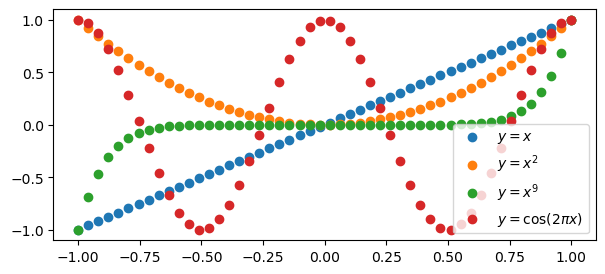

In [13]:
x = np.linspace(-1,1,50)
y1 = x
y2 = x**2
y3 = x**9
y4 = np.cos(2*np.pi*x)

r1 = np.corrcoef(x, y1)[0, 1]
r2 = np.corrcoef(x, y2)[0, 1]
r3 = np.corrcoef(x, y3)[0, 1]
r4 = np.corrcoef(x, y4)[0, 1]
print(r1, r2, r3, r4)

plt.figure( figsize=(7,3) )
plt.scatter(x, y1, label='$y=x$')
plt.scatter(x, y2, label='$y=x^2$')
plt.scatter(x, y3, label='$y=x^9$')
plt.scatter(x, y4, label='$y=\cos(2 \pi x)$')
plt.legend()
plt.show()


# Exercício 7
*Objetivo: usar a correlação para sustentar argumentos sobre a ligação entre variáveis*

Usando o coeficiente de correlação, calcule dados que sustentam as suas conclusões feitas no exercício 2 e no exercício 4. Dica: Use o método `corr` do Pandas!

In [14]:
# Resolva o exercício 7 aqui

# Exercício 8
*Objetivo: comparar correlações de diferentes séries para gerar hipóteses sobre diferentes comportamentos*

Podemos argumentar que a análise feita no exercício 7 é incompleta porque considera apenas um ano. Talvez o que tenha acontecido é que os países que já eram cheios de florestas continuaram cheios de florestas e os que não tinham florestas continuaram assim, ou talvez os países ricos tenham simplesmente tido mais recursos para reflorestar seus territórios. Por isso, deveríamos analisar os dados históricos relacionando PIB *per capita* e taxa de florestamento para cada país.

Faz parte do senso comum pensar que, quanto maior o nível educacional de uma pessoa, maior será sua renda.

1. Faça uma figura que responda à pergunta: "É necessário desmatar para promover o crescimento de um país?"
1. Usando as técnicas que aprendemos hoje, faça uma figura que evidencie a resposta à sua pergunta.
2. Não esqueça de rotular eixos e colocar título na figura! No título, tanto a pergunta quanto a resposta devem ficar evidentes.
3. Submeta sua figura no Blackboard.

In [89]:
df_area_florestal = pd.read_csv('dados/WorldBank/API_AG.LND.FRST.ZS_DS2_en_csv_v2_3731376.csv', skiprows=3).set_index('Country Name')
df_pib_per_capita = pd.read_csv('dados/WorldBank/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3731360.csv', skiprows=3).set_index('Country Name')
